In [79]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
test['Survived'] = 0
combined = train.append(test,sort=False)

In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 12)

In [6]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
fig = plt.figure(figsize=(16,10), dpi=100)

<Figure size 1600x1000 with 0 Axes>

Text(0.5, 1.0, 'Passengers per boarding location')

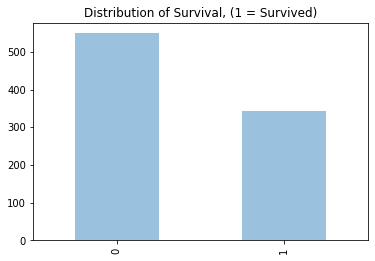

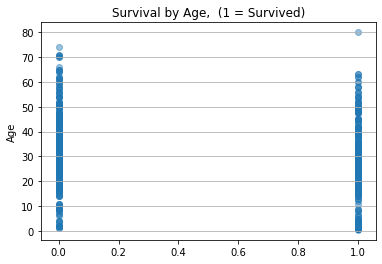

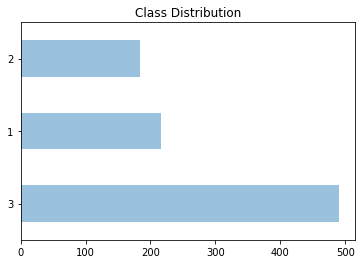

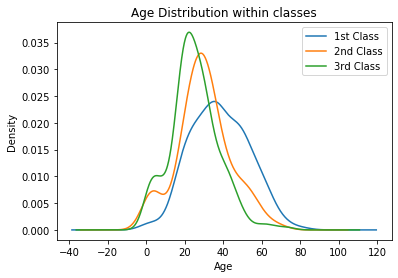

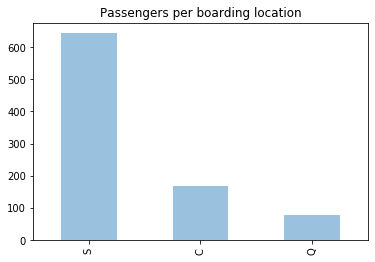

In [19]:
alpha_bar_chart = 0.45
train.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title("Distribution of Survival, (1 = Survived)")

plt.figure()
alpha_scatterplot = 0.45
plt.scatter(train.Survived,train.Age, alpha=alpha_scatterplot)
# # sets the y axis lable
plt.ylabel("Age")
plt.grid(b=True, which='major', axis='y')
plt.title("Survival by Age,  (1 = Survived)")

plt.figure()
train.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
plt.title("Class Distribution")

plt.figure()
train.Age[train.Pclass == 1].plot(kind='kde')
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')

plt.figure()
train.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title("Passengers per boarding location")

Text(0.5, 1.0, 'Survival Breakdown (1 = Survived, 0 = Died)')

<Figure size 432x288 with 0 Axes>

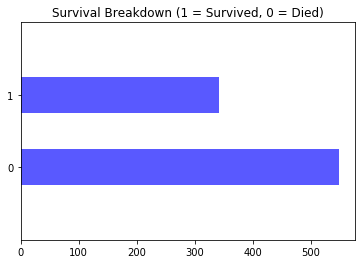

In [23]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
train.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(train.Survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

(-1, 2)

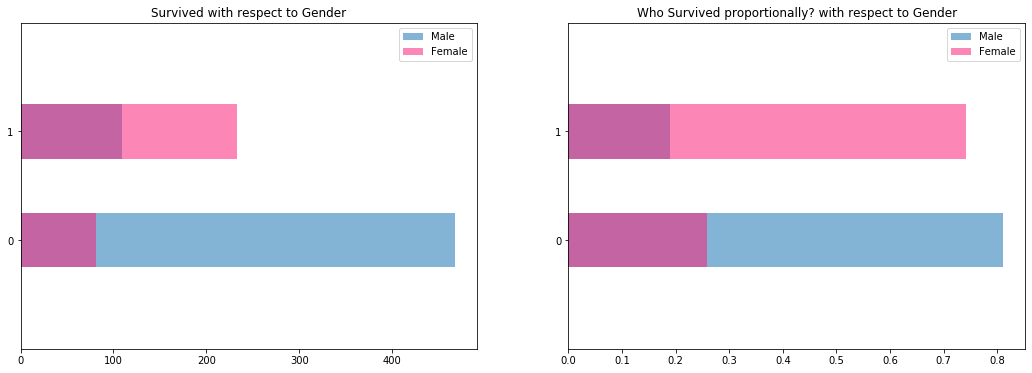

In [36]:
fig = plt.figure(figsize=(18,6))

train_male = train.Survived[train.Sex == 'male'].value_counts().sort_index()
train_female = train.Survived[train.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
train_male.plot(kind='barh',label='Male', alpha=0.55)
train_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Survived with respect to Gender"); plt.legend(loc='best')
ax1.set_ylim(-1, 2)

ax2 = fig.add_subplot(122)
(train_male/float(train_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(train_female/float(train_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')
ax2.set_ylim(-1, 2)

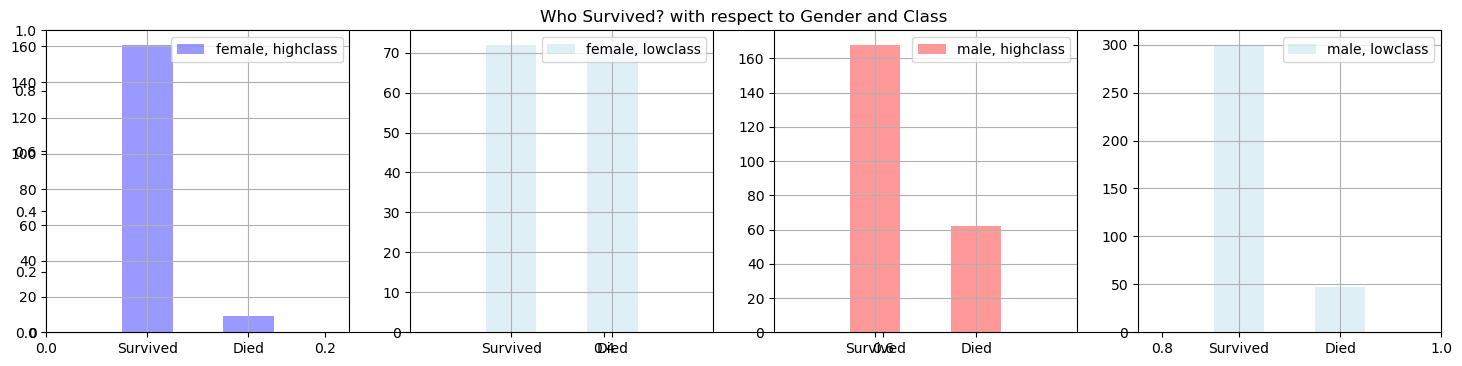

In [66]:
fig = plt.figure(figsize=(18,4), dpi=100)
alpha_level = 0.4
plt.title("Who Survived? with respect to Gender and Class");
ax1 = fig.add_subplot(141)
female_highclass = train.Survived[train.Sex == 'female'][train.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='b', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
ax1.legend(loc='best')
ax1.grid(True)

ax2 = fig.add_subplot(142)
female_lowclass = train.Survived[train.Sex == 'female'][train.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, lowclass', color='lightblue', alpha=alpha_level)
ax2.set_xticklabels(["Survived", "Died"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
ax2.legend(loc='best')
ax2.grid(True)

ax3 = fig.add_subplot(143)
male_highclass = train.Survived[train.Sex == 'male'][train.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', color='r', alpha=alpha_level)
ax3.set_xticklabels(["Survived", "Died"], rotation=0)
ax3.set_xlim(-1, len(male_highclass))
ax3.legend(loc='best')
ax3.grid(True)

ax4 = fig.add_subplot(144)
male_lowclass = train.Survived[train.Sex == 'male'][train.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, lowclass', color='lightblue', alpha=alpha_level)
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(male_lowclass))
ax4.legend(loc='best')
ax4.grid(True)


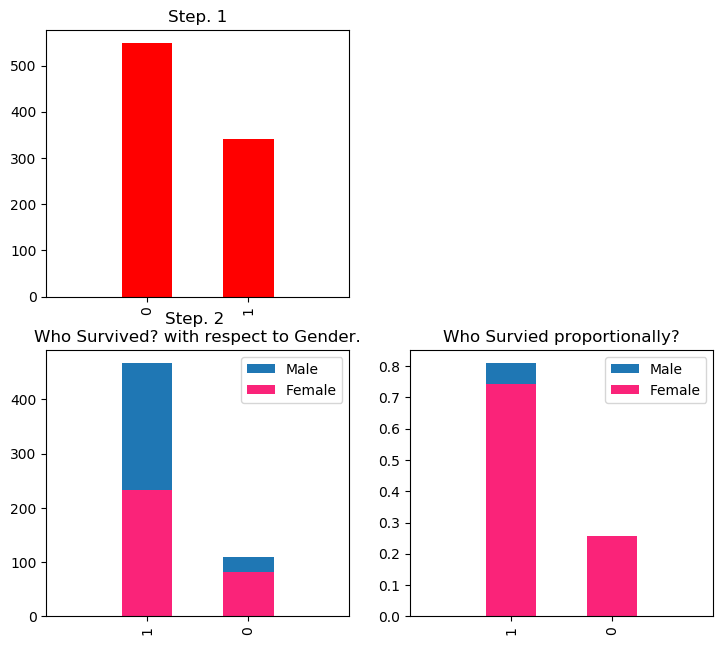

In [74]:
fig = plt.figure(figsize=(18, 12), dpi= 100)
a = 0.45

ax1 = fig.add_subplot(341)
train.Survived.value_counts().plot(kind='bar', color="r", label = 'male')
ax1.set_xlim(-1, len(train.Survived.value_counts()))
plt.title("Step. 1")

ax2 = fig.add_subplot(345)
train.Survived[train.Sex == 'male'].value_counts().plot(kind='bar',label='Male')
train.Survived[train.Sex == 'female'].value_counts().plot(kind='bar', color='#FA2379',label='Female')
ax2.set_xlim(-1, 2)
plt.title("Step. 2 \nWho Survived? with respect to Gender."); plt.legend(loc='best')

ax3 = fig.add_subplot(346)
(train.Survived[train.Sex == 'male'].value_counts()/float(train.Sex[train.Sex == 'male'].size)).plot(kind='bar',label='Male')
(train.Survived[train.Sex == 'female'].value_counts()/float(train.Sex[train.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
ax3.set_xlim(-1,2)
plt.title("Who Survied proportionally?"); plt.legend(loc='best')


In [75]:
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked)' 
results = {}

In [80]:
from patsy import dmatrices
# 
y,x = dmatrices(formula, data=train, return_type='dataframe')
model = sm.Logit(y,x)
res = model.fit()
results['Logit'] = [res, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.443841
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  713
Model:                          Logit   Df Residuals:                      705
Method:                           MLE   Df Model:                            7
Date:                Sun, 29 Mar 2020   Pseudo R-squ.:                  0.3426
Time:                        21:31:23   Log-Likelihood:                -316.46
converged:                       True   LL-Null:                       -481.36
Covariance Type:            nonrobust   LLR p-value:                 2.595e-67
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.5483      0.474      9.602      0.000       3.620       5.477
C(Pclass)[T.2]      -1.2691      0.299     -4.251      0.000      -1.854      -0.684
C(Pclass)[T.3]      -2.4988      0.296     -8.430      0.000      -3.080      -1.918
C(Sex)[T.male]      -2.6260      0.217    -12.074      0.000      -3.052      -2.200
C(Embarked)[T.Q]    -0.8380      0.597     -1.403      0.161      -2.009       0.333
C(Embarked)[T.S]    -0.4277      0.271     -1.581      0.114      -0.958       0.103
Age                 -0.0437      0.008     -5.265      0.000      -0.060      -0.027
SibSp               -0.3703      0.123     -3.008      0.003      -0.612      -0.129
====================================================================================
"""

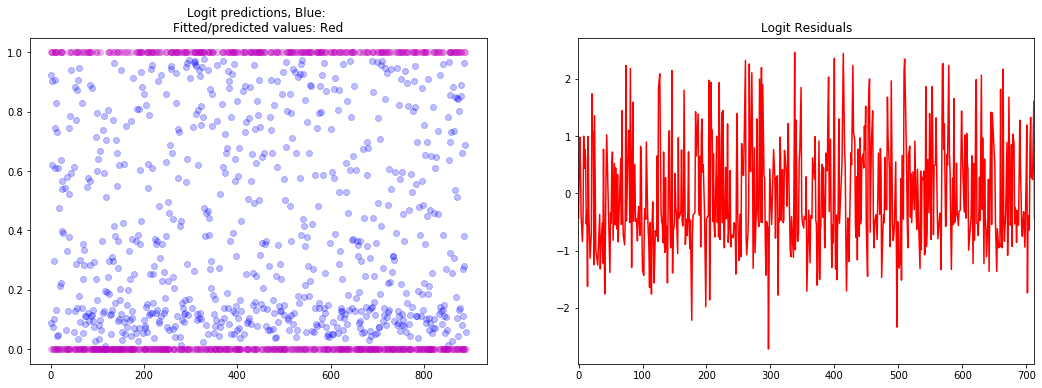

In [84]:
# Plot Predictions Vs Actual
plt.figure(figsize=(18,6));
plt.subplot(121)
# generate predictions from our fitted model
ypred = res.predict(x)
plt.plot(x.index, ypred, 'bo', x.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red');

# Residuals
ax2 = plt.subplot(122)
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev))
plt.title('Logit Residuals');

Text(0, 0.5, 'Age')

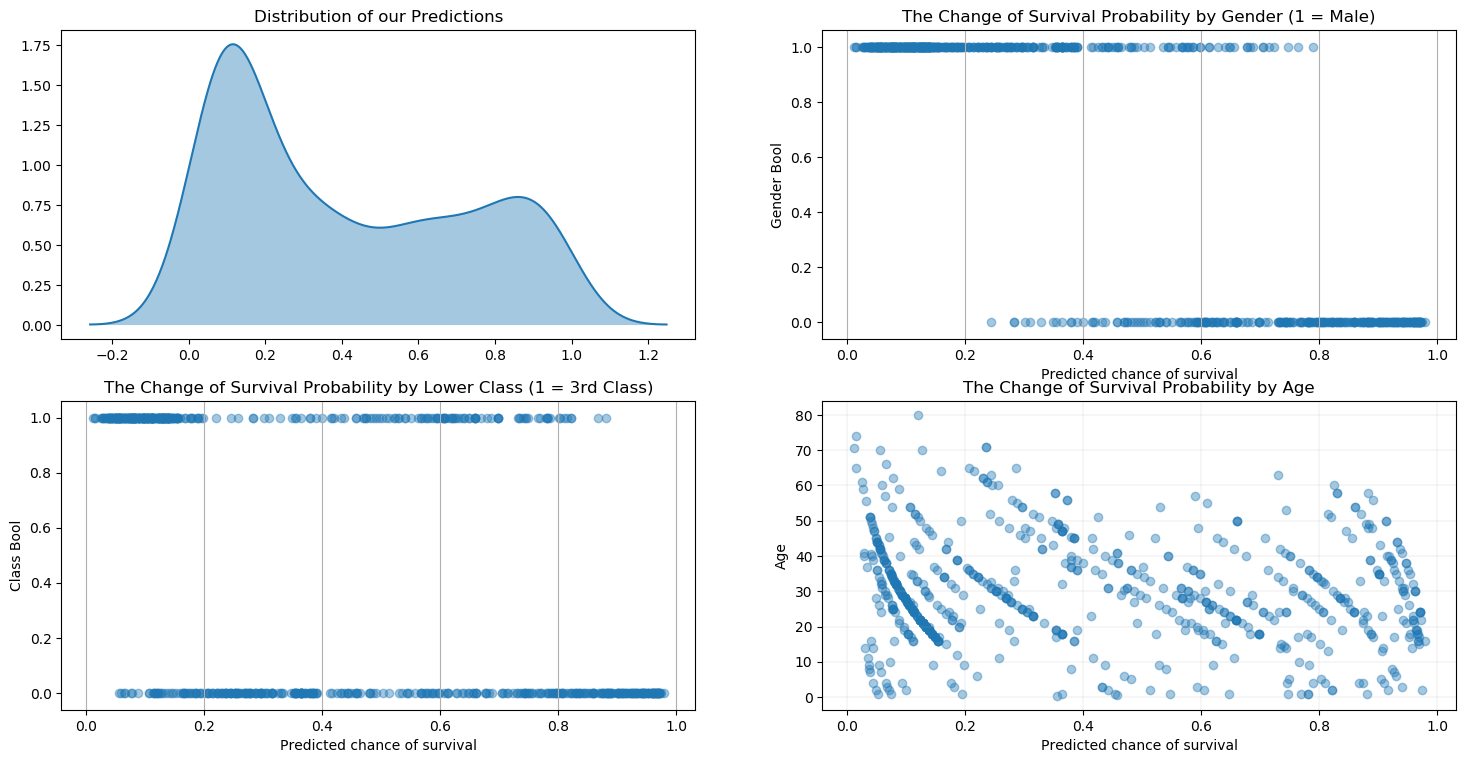

In [91]:
from statsmodels.nonparametric.kde import KDEUnivariate
fig = plt.figure(figsize=(18,9), dpi=100)
a = .4

# Below are examples of more advanced plotting. 
# It it looks strange check out the tutorial above.
fig.add_subplot(221)
kde_res = KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=a)
plt.title("Distribution of our Predictions")

fig.add_subplot(222)
plt.scatter(res.predict(),x['C(Sex)[T.male]'] , alpha=a)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted chance of survival")
plt.ylabel("Gender Bool")
plt.title("The Change of Survival Probability by Gender (1 = Male)")

fig.add_subplot(223)
plt.scatter(res.predict(),x['C(Pclass)[T.3]'] , alpha=a)
plt.xlabel("Predicted chance of survival")
plt.ylabel("Class Bool")
plt.grid(b=True, which='major', axis='x')
plt.title("The Change of Survival Probability by Lower Class (1 = 3rd Class)")

fig.add_subplot(224)
plt.scatter(res.predict(),x.Age , alpha=a)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Age")
plt.xlabel("Predicted chance of survival")
plt.ylabel("Age")

In [92]:
test_data = pd.read_csv("data/test.csv")

In [93]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Figure size 576x432 with 0 Axes>

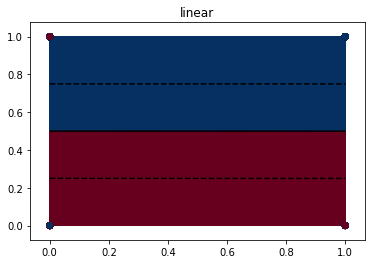

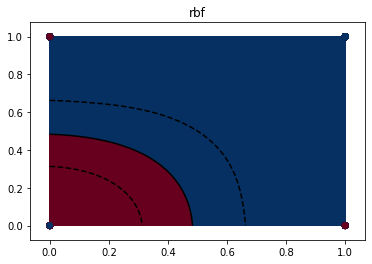

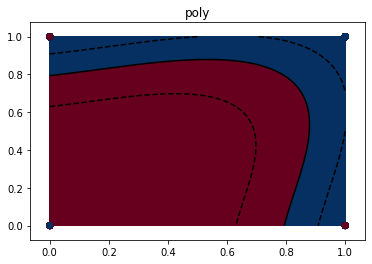

In [97]:
# set plotting parameters

from sklearn import datasets, svm
plt.figure(figsize=(8,6))
formula_ml = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'

# create a regression friendly data frame
y, x = dmatrices(formula_ml, data=train, return_type='matrix')

# select which features we would like to analyze
# try chaning the selection here for diffrent output.
# Choose : [2,3] - pretty sweet DBs [3,1] --standard DBs [7,3] -very cool DBs,
# [3,6] -- very long complex dbs, could take over an hour to calculate! 
feature_1 = 2
feature_2 = 3

X = np.asarray(x)
X = X[:,[feature_1, feature_2]]  


y = np.asarray(y)
# needs to be 1 dimenstional so we flatten. it comes out of dmatirces with a shape. 
y = y.flatten()      

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)

X = X[order]
y = y[order].astype(np.float)

# do a cross validation
nighty_precent_of_sample = int(.9 * n_sample)
X_train = X[:nighty_precent_of_sample]
y_train = y[:nighty_precent_of_sample]
X_test = X[nighty_precent_of_sample:]
y_test = y[nighty_precent_of_sample:]

# create a list of the types of kerneks we will use for your analysis
types_of_kernels = ['linear', 'rbf', 'poly']

# specify our color map for plotting the results
color_map = plt.cm.RdBu_r

# fit the model
for fig_num, kernel in enumerate(types_of_kernels):
    clf = svm.SVC(kernel=kernel, gamma=3)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=color_map)

    # circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)
    
    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=color_map)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
               levels=[-.5, 0, .5])

    plt.title(kernel)
    plt.show()

In [99]:
# import the machine learning library that holds the randomforest
import sklearn.ensemble as ske

# Create the random forest model and fit the model to our training data
y, x = dmatrices(formula_ml, data=train, return_type='dataframe')
# RandomForestClassifier expects a 1 demensional NumPy array, so we convert
y = np.asarray(y).ravel()
#instantiate and fit our model
results_rf = ske.RandomForestClassifier(n_estimators=100).fit(x, y)

# Score the results
score = results_rf.score(x, y)
print("Mean accuracy of Random Forest Predictions on the data was: {0}".format(score))

Mean accuracy of Random Forest Predictions on the data was: 0.9453015427769986
